In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../movieReplicationSet.csv')

In [3]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
movie_cols = df.columns[0:400]

In [5]:
movie_cols

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'X-Men 2 (2003)', 'The Usual Suspects (1995)', 'The Mask (1994)',
       'Jaws (1975)', 'Harry Potter and the Chamber of Secrets (2002)',
       'Patton (1970)', 'Anaconda (1997)', 'Twister (1996)',
       'MacArthur (1977)', 'Look Who's Talking (1989)'],
      dtype='object', length=400)

In [6]:
sensation_cols = df.columns[400:420]

In [7]:
sensation_cols

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'],
      dtype='object')

In [8]:
personality_cols = df.columns[420:464]

In [9]:
personality_cols

Index(['Is talkative', 'Tends to find fault with others',
       'Does a thorough job', 'Is depressed/Blue',
       'Is original/comes up with new ideas', 'Is reserved',
       'Is helpful and unselfish with others', 'Can be somewhat careless',
       'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious/a deep thinker', 'Generates a lot of Enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences', 'Is sometimes shy/inhibited',
       'Is considerate and kind to al

In [10]:
movie_rating_cols = df.columns[464:474]

In [11]:
movie_rating_cols

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')

In [12]:
gender_identity_cols = df.columns[474:475]

In [13]:
gender_identity_cols

Index(['Gender identity (1 = female; 2 = male; 3 = self-described)'], dtype='object')

In [14]:
only_child_cols = df.columns[475:476]

In [15]:
pd.value_counts(df[gender_identity_cols[0]])

/var/folders/jt/k9b7wwrn7fnc6l3g0xlf5xn80000gn/T/ipykernel_20821/3177665950.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df[gender_identity_cols[0]])


Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
3.0      6
Name: count, dtype: int64

In [16]:
pd.value_counts(df[only_child_cols[0]])

/var/folders/jt/k9b7wwrn7fnc6l3g0xlf5xn80000gn/T/ipykernel_20821/1658472678.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df[only_child_cols[0]])


Are you an only child? (1: Yes; 0: No; -1: Did not respond)
 0    894
 1    177
-1     26
Name: count, dtype: int64

In [17]:
alone_cols = df.columns[476:477]

In [18]:
pd.value_counts(df[alone_cols[0]])

/var/folders/jt/k9b7wwrn7fnc6l3g0xlf5xn80000gn/T/ipykernel_20821/4026121557.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df[alone_cols[0]])


Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
 1    610
 0    462
-1     25
Name: count, dtype: int64

All movies have at least one rating, but this is not the case for all users. Dropping completely empty users.

In [19]:
df_movies = df[movie_cols]
df_movies = df_movies.dropna(how='all', subset=movie_cols)

In [20]:
avg_movie = df_movies.mean(axis = 0)
avg_usr = df_movies.mean(axis = 1)

In [21]:
def fill_na(x):
    movie_avg_val = avg_movie[x.name]
    fill_vals = (avg_usr + movie_avg_val)/2
    return x.fillna(fill_vals)

In [22]:
df_filled = df_movies.apply(fill_na)

# AFYD

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?
2. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?
3. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)
4. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).


### General assumptions for the work:

- The movie ratings can be treated as continuous variables.
- The missing movie ratings can be filled as the arithmetic mean between a user's average rating and a movie's average rating. We are careful not to include the answers of the other questions in this fill.
- For other questions that are not movie ratings, missing questions will be filled with the mode.

# Question 1:

For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie (and their associated COD values, as well as which movie
ratings are the best predictor, so this table should have 3 columns).

In [23]:
movie_cod = dict()
movie_score = dict()
movie_best_predictor = dict()

for movie in df_filled.columns:
    other_movies = [other_movie for other_movie in df_movies.columns if other_movie != movie]
    best_predictor = None
    best_cod = None
    best_score = np.infty
    for predictor_movie in other_movies:
        X = df_filled[[predictor_movie]].values
        y = df_movies[movie].values.reshape(-1)
        valid_mask = ~np.isnan(y)
        X = X[valid_mask]
        y = y[valid_mask]
        reg = LinearRegression().fit(X, y)
        preds = reg.predict(X)
        score = np.mean((y-preds)**2)
        if score < best_score:
            best_predictor = predictor_movie
            best_cod = reg.score(X, y)
            best_score = score
    movie_cod[movie] = best_cod
    movie_score[movie] = best_score
    movie_best_predictor[movie] = best_predictor

For each of the 400 movies, find the movie that predicts ratings the best.

In [24]:
movie_best_predictor

{'The Life of David Gale (2003)': 'Flowers in the Attic (1987)',
 'Wing Commander (1999)': 'Funny Girl (1968)',
 'Django Unchained (2012)': 'Inglorious Bastards (2009)',
 'Alien (1979)': 'Aliens (1986)',
 'Indiana Jones and the Last Crusade (1989)': 'Indiana Jones and the Temple of Doom (1984)',
 'Snatch (2000)': 'Full Metal Jacket (1987)',
 'Rambo: First Blood Part II (1985)': 'Godzilla (1998)',
 'Fargo (1996)': 'Taxi Driver (1976)',
 'Let the Right One In (2008)': 'Brazil (1985)',
 'Black Swan (2010)': 'The Shining (1980)',
 'King Kong (1976)': 'Indiana Jones and the Temple of Doom (1984)',
 'The Machinist (2004)': 'Requiem for a Dream (2000)',
 'A Nightmare on Elm Street (1984)': 'The Exorcist (1973)',
 'Brazil (1985)': 'The Bridges of Madison County (1995)',
 'The Fast and the Furious (2001)': 'Transformers: Age of Extinction (2014)',
 'Change of Habit (1969)': 'Just Like Heaven (2005)',
 'American Beauty (1999)': 'The Shining (1980)',
 'Psycho (1960)': 'The Shining (1980)',
 'Term

Then report the average COD of those 400 simple linear regression models

In [25]:
avg_cod = np.mean(list(movie_cod.values()))
avg_cod

0.37862277330756244

Please include a histogram of these 400 COD values

/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

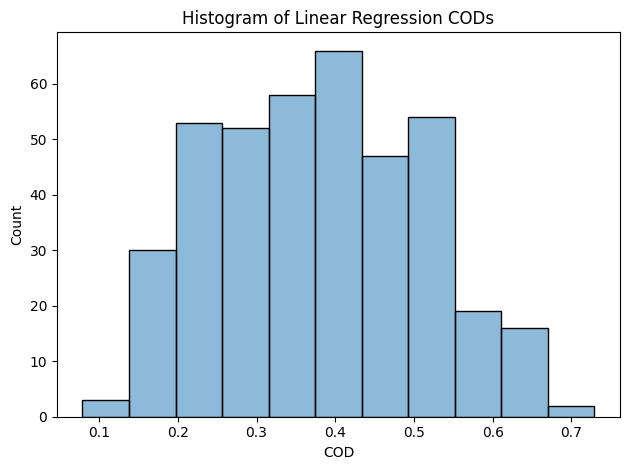

In [26]:
fig, ax = plt.subplots(1, 1)
sns.histplot(movie_cod.values(), legend=False)
plt.title('Histogram of Linear Regression CODs')
plt.xlabel('COD')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('cod_histogram.png')

In [27]:
np.mean(list(movie_score.values()))

0.6853448532293385

/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

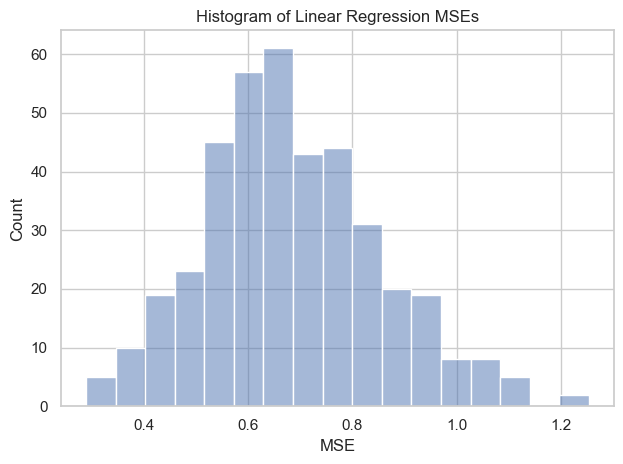

In [72]:
fig, ax = plt.subplots(1, 1)
sns.histplot(movie_score.values(), legend=False)
plt.title('Histogram of Linear Regression MSEs')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('mse_histogram.png')

Table with the 10 movies that are most easily predicted from the ratings of a single other movie, (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [29]:
best_pred_by_single = sorted(movie_score.items(), key=lambda x:np.abs(x[1]))[:10]

In [30]:
best_pred_by_single

[('Harry Potter and the Chamber of Secrets (2002)', 0.2897551717185461),
 ("Harry Potter and the Sorcerer's Stone (2001)", 0.2921194963174875),
 ('The Lord of the Rings: The Two Towers (2002)', 0.29279967397909124),
 ('Harry Potter and the Goblet of Fire (2005)', 0.30735526799436785),
 ('The Lord of the Rings: The Fellowship of the Ring (2001)',
  0.3199014379902215),
 ('Monsters  Inc.(2001)', 0.35136185918107),
 ('The Lord of the Rings: The Return of the King (2003)', 0.3548284339636365),
 ('Toy Story 2 (1999)', 0.3560867652627068),
 ('Toy Story 3 (2010)', 0.36306500464460195),
 ('Harry Potter and the Deathly Hallows: Part 2 (2011)', 0.3707455437285948)]

In [31]:
pd.DataFrame.from_records([{'Movie':k, 'COD':movie_cod[k], 'Best Predictor Movie':movie_best_predictor[k]} for k,v in best_pred_by_single])

,Movie,COD,Best Predictor Movie
0,Harry Potter and the Chamber of Secrets (2002),0.621386,Harry Potter and the Sorcerer's Stone (2001)
1,Harry Potter and the Sorcerer's Stone (2001),0.587874,Harry Potter and the Chamber of Secrets (2002)
2,The Lord of the Rings: The Two Towers (2002),0.729158,The Lord of the Rings: The Fellowship of the R...
3,Harry Potter and the Goblet of Fire (2005),0.559421,Harry Potter and the Chamber of Secrets (2002)
4,The Lord of the Rings: The Fellowship of the R...,0.712979,The Lord of the Rings: The Two Towers (2002)
5,Monsters Inc.(2001),0.405366,Toy Story (1995)
6,The Lord of the Rings: The Return of the King ...,0.665777,The Lord of the Rings: The Two Towers (2002)
7,Toy Story 2 (1999),0.513699,Toy Story 3 (2010)
8,Toy Story 3 (2010),0.494480,Toy Story 2 (1999)
9,Harry Potter and the Deathly Hallows: Part 2 (...,0.499581,Harry Potter and the Sorcerer's Stone (2001)


Table with the 10 movies that are most difficult to predict from the ratings of a single other movie, (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [32]:
hardest_pred_by_single = sorted(movie_score.items(), key=lambda x:np.abs(x[1]), reverse=True)[:10]

In [33]:
hardest_pred_by_single

[('The Cabin in the Woods (2012)', 1.2532405469460774),
 ('Saw (2004)', 1.2444435488626688),
 ('La La Land (2016)', 1.1148231011153917),
 ('Grown Ups 2 (2013)', 1.1131005491567239),
 ('Ghostbusters (2016)', 1.101061049716361),
 ('The Conjuring (2013)', 1.100427909039291),
 ('The Texas Chainsaw Massacre (1974)', 1.0974460167144295),
 ('Signs (2002)', 1.0779083108210092),
 ('The Babadook (2014)', 1.0754626874746895),
 ('Arachnophobia (1990)', 1.0554820288253703)]

In [34]:
pd.DataFrame.from_records([{'Movie':k, 'COD':movie_cod[k], 'Best Predictor Movie':movie_best_predictor[k]} for k,v in hardest_pred_by_single])

,Movie,COD,Best Predictor Movie
0,The Cabin in the Woods (2012),0.153034,The Texas Chainsaw Massacre (1974)
1,Saw (2004),0.217719,The Ring (2002)
2,La La Land (2016),0.139589,Titanic (1997)
3,Grown Ups 2 (2013),0.182619,Cheaper by the Dozen (2003)
4,Ghostbusters (2016),0.151781,Divine Secrets of the Ya-Ya Sisterhood (2002)
5,The Conjuring (2013),0.224324,The Exorcist (1973)
6,The Texas Chainsaw Massacre (1974),0.281777,A Nightmare on Elm Street (1984)
7,Signs (2002),0.164093,Barb Wire (1996)
8,The Babadook (2014),0.147951,The Deer Hunter (1978)
9,Arachnophobia (1990),0.293384,Halloween (1978)


## AFYD for Question 1

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

    - We chose to only train and evaluate using known targets. That is, not training on filled labels.
    - We chose to evaluate performance using MSE. By easily predicted, we made the choice to mean: With the lowest Mean Squared Error.
    - We dropped all users with no known ratings (that is, that haven't rated even a movie). Just one user in this case.

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

    - In order to model the intended variable and only evaluate for known data, as due to sparsity, the training data would mostly consist of filled target values otherwise.
    - This is the same metric that OLS regression minimizes, and it allows us to directly compare the expected rating with the predicted rating. It is a good rule of thumb to use the same metric for model training and evaluation, so we decided to use this instead of COD.
    - Such users are untreatable given the recommendations for the project.

4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)

    - Best single predictor for each movie.
    - An average COD of 0.378.
    - The histogram.
    - The two tables.
 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).

        - TBD


# Question 2

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1). Comment on how R^2 has changed relative to the answers in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [35]:
selected_movies = [x[0] for x in best_pred_by_single + hardest_pred_by_single]

In [36]:
selected_movies

['Harry Potter and the Chamber of Secrets (2002)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'The Lord of the Rings: The Two Towers (2002)',
 'Harry Potter and the Goblet of Fire (2005)',
 'The Lord of the Rings: The Fellowship of the Ring (2001)',
 'Monsters  Inc.(2001)',
 'The Lord of the Rings: The Return of the King (2003)',
 'Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Harry Potter and the Deathly Hallows: Part 2 (2011)',
 'The Cabin in the Woods (2012)',
 'Saw (2004)',
 'La La Land (2016)',
 'Grown Ups 2 (2013)',
 'Ghostbusters (2016)',
 'The Conjuring (2013)',
 'The Texas Chainsaw Massacre (1974)',
 'Signs (2002)',
 'The Babadook (2014)',
 'Arachnophobia (1990)']

In [37]:
gender_vals = df.loc[df_movies.index][gender_identity_cols[0]].values
sibship_vals = df.loc[df_movies.index][only_child_cols[0]].values
social_vals = df.loc[df_movies.index][alone_cols[0]].values

In [38]:
from scipy.stats import mode

### Experiment 1: Drop the missing values

In [39]:
movie_cod_q2 = dict()

for movie in selected_movies:
    predictor_movie = movie_best_predictor[movie]
    y = df_movies[movie].values.reshape(-1)
    valid_mask = ~np.isnan(y)
    y = y[valid_mask]
    m = df_filled[predictor_movie].values[valid_mask]
    g = gender_vals[valid_mask]
    g[g == 3.0] = np.nan
    #g[np.isnan(g)] = mode(g).mode
    si = sibship_vals[valid_mask].astype(float)
    si[si == -1.0] = np.nan
    #si[np.isnan(si)] = mode(si).mode
    so = social_vals[valid_mask].astype(float)
    so[so == -1.0] = np.nan
    #so[np.isnan(so)] = mode(so).mode

    drop_idxs = np.isnan(g) | np.isnan(so) | np.isnan(si)

    y = y[~drop_idxs]
    m = m[~drop_idxs]
    g = g[~drop_idxs]
    si = si[~drop_idxs]
    so = so[~drop_idxs]
    
    X = np.transpose(np.vstack([m,g,si,so]))
    reg = LinearRegression().fit(X, y)
    movie_cod_q2[movie] = reg.score(X, y)

In [40]:
movie_cod_q2

{'Harry Potter and the Chamber of Secrets (2002)': 0.6237935306961533,
 "Harry Potter and the Sorcerer's Stone (2001)": 0.5955715986850137,
 'The Lord of the Rings: The Two Towers (2002)': 0.7246398776396874,
 'Harry Potter and the Goblet of Fire (2005)': 0.5623718663993742,
 'The Lord of the Rings: The Fellowship of the Ring (2001)': 0.7097526550807294,
 'Monsters  Inc.(2001)': 0.4101175449832236,
 'The Lord of the Rings: The Return of the King (2003)': 0.6618821899756232,
 'Toy Story 2 (1999)': 0.5216587578655745,
 'Toy Story 3 (2010)': 0.5018881880557834,
 'Harry Potter and the Deathly Hallows: Part 2 (2011)': 0.5047598172345976,
 'The Cabin in the Woods (2012)': 0.1740064148292314,
 'Saw (2004)': 0.24106207776566124,
 'La La Land (2016)': 0.14337727890798746,
 'Grown Ups 2 (2013)': 0.19071359467891558,
 'Ghostbusters (2016)': 0.20761212859590772,
 'The Conjuring (2013)': 0.2292626142234082,
 'The Texas Chainsaw Massacre (1974)': 0.27585989189591187,
 'Signs (2002)': 0.1735000915937

In [41]:
movie_cod_q1 = {x:movie_cod[x] for x in selected_movies}
movie_cod_q1

{'Harry Potter and the Chamber of Secrets (2002)': 0.6213861700543625,
 "Harry Potter and the Sorcerer's Stone (2001)": 0.587873888371262,
 'The Lord of the Rings: The Two Towers (2002)': 0.7291575435449105,
 'Harry Potter and the Goblet of Fire (2005)': 0.5594209667920071,
 'The Lord of the Rings: The Fellowship of the Ring (2001)': 0.7129794461908924,
 'Monsters  Inc.(2001)': 0.4053661717122031,
 'The Lord of the Rings: The Return of the King (2003)': 0.6657769570384618,
 'Toy Story 2 (1999)': 0.5136988393474742,
 'Toy Story 3 (2010)': 0.4944802063870236,
 'Harry Potter and the Deathly Hallows: Part 2 (2011)': 0.49958148328004903,
 'The Cabin in the Woods (2012)': 0.15303353861507207,
 'Saw (2004)': 0.21771862406423892,
 'La La Land (2016)': 0.1395885778060808,
 'Grown Ups 2 (2013)': 0.18261949108399989,
 'Ghostbusters (2016)': 0.1517807561054484,
 'The Conjuring (2013)': 0.22432422490590254,
 'The Texas Chainsaw Massacre (1974)': 0.28177705393317254,
 'Signs (2002)': 0.1640930741744

In [42]:
idxs = np.argsort(list(movie_cod_q1.values()))

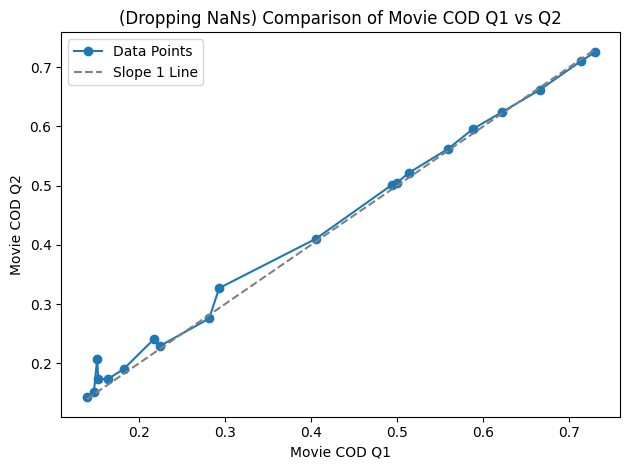

In [43]:
fig, ax = plt.subplots(1, 1)
# Create the plot
plt.plot(np.array(list(movie_cod_q1.values()))[idxs], np.array(list(movie_cod_q2.values()))[idxs], marker='o', label='Data Points')

# Add the slope 1 line
min_val = min(np.min(list(movie_cod_q1.values())), np.min(list(movie_cod_q2.values())))
max_val = max(np.max(list(movie_cod_q1.values())), np.max(list(movie_cod_q2.values())))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', label='Slope 1 Line')

# Add a title, x-axis label, and y-axis label
plt.title('(Dropping NaNs) Comparison of Movie COD Q1 vs Q2')
plt.xlabel('Movie COD Q1')
plt.ylabel('Movie COD Q2')

# Show legend
plt.legend()

# Display the plot
#plt.show()
plt.tight_layout()
plt.savefig('cod_slope_dropping.png')

/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

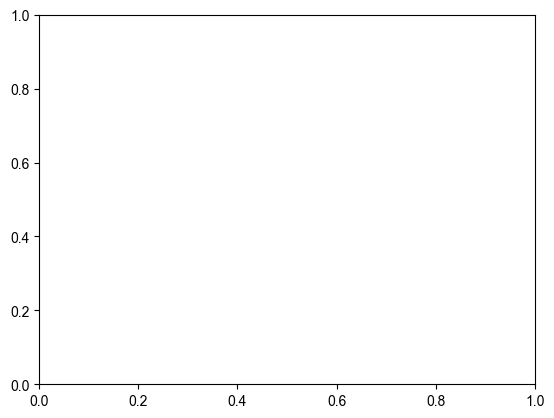

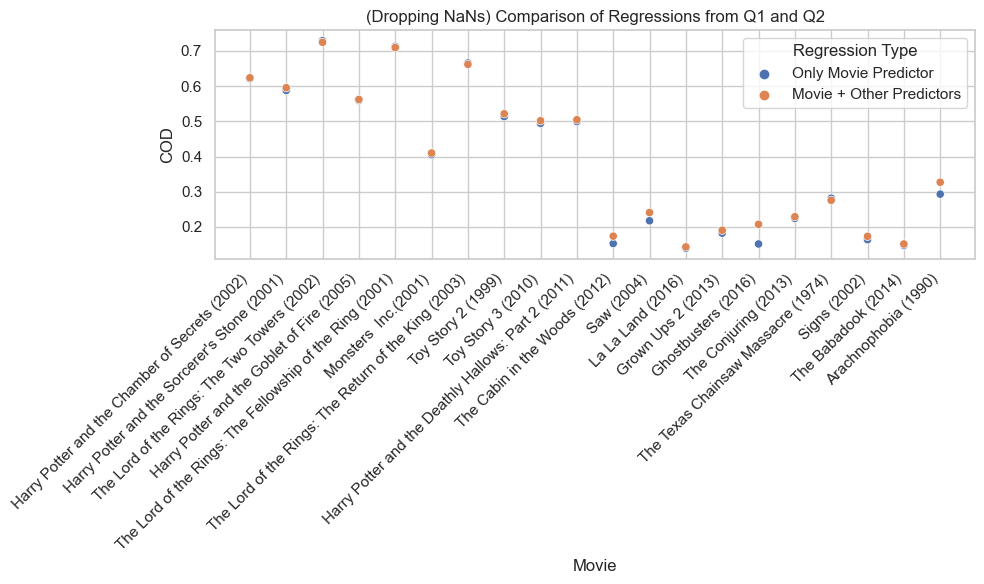

In [44]:
fig, ax = plt.subplots(1, 1)
df_q1 = pd.DataFrame(list(movie_cod_q1.items()), columns=['Movie', 'COD'])
df_q2 = pd.DataFrame(list(movie_cod_q2.items()), columns=['Movie', 'COD'])

# Add a 'Source' column to identify the source of data
df_q1['Regression Type'] = 'Only Movie Predictor'
df_q2['Regression Type'] = 'Movie + Other Predictors'

# Concatenate the DataFrames vertically
combined_df = pd.concat([df_q1, df_q2])

# Create the Seaborn plot
sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plot = sns.scatterplot(x="Movie", y="COD", hue="Regression Type", data=combined_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the plot
plt.title("(Dropping NaNs) Comparison of Regressions from Q1 and Q2")
plt.xlabel("Movie")
plt.ylabel("COD")
plt.legend(title="Regression Type", loc="upper right")

# Show the plo
# plot COD1 and COD2 on the x and y axis
#plt.show()
plt.tight_layout()
plt.savefig('movie_comp_dropping.png')

## Experiment 2: Impute the missing values

In [45]:
movie_cod_q2 = dict()

for movie in selected_movies:
    predictor_movie = movie_best_predictor[movie]
    y = df_movies[movie].values.reshape(-1)
    valid_mask = ~np.isnan(y)
    y = y[valid_mask]
    m = df_filled[predictor_movie].values[valid_mask]
    g = gender_vals[valid_mask]
    g[g == 3.0] = np.nan
    g[np.isnan(g)] = mode(g).mode
    si = sibship_vals[valid_mask].astype(float)
    si[si == -1.0] = np.nan
    si[np.isnan(si)] = mode(si).mode
    so = social_vals[valid_mask].astype(float)
    so[so == -1.0] = np.nan
    so[np.isnan(so)] = mode(so).mode

    #drop_idxs = np.isnan(g) | np.isnan(so) | np.isnan(si)

    #y = y[~drop_idxs]
    #m = m[~drop_idxs]
    #g = g[~drop_idxs]
    #si = si[~drop_idxs]
    #so = so[~drop_idxs]
    
    X = np.transpose(np.vstack([m,g,si,so]))
    reg = LinearRegression().fit(X, y)
    movie_cod_q2[movie] = reg.score(X, y)

In [46]:
movie_cod_q2

{'Harry Potter and the Chamber of Secrets (2002)': 0.6235160928398493,
 "Harry Potter and the Sorcerer's Stone (2001)": 0.5887087138451712,
 'The Lord of the Rings: The Two Towers (2002)': 0.7299058950491674,
 'Harry Potter and the Goblet of Fire (2005)': 0.5641107488934898,
 'The Lord of the Rings: The Fellowship of the Ring (2001)': 0.7138572142294031,
 'Monsters  Inc.(2001)': 0.4062309189015646,
 'The Lord of the Rings: The Return of the King (2003)': 0.6665028787123646,
 'Toy Story 2 (1999)': 0.5146883682238781,
 'Toy Story 3 (2010)': 0.4974794532900285,
 'Harry Potter and the Deathly Hallows: Part 2 (2011)': 0.501662124089786,
 'The Cabin in the Woods (2012)': 0.17276852952567323,
 'Saw (2004)': 0.2293184378128741,
 'La La Land (2016)': 0.14625462373500242,
 'Grown Ups 2 (2013)': 0.1896075081839632,
 'Ghostbusters (2016)': 0.20046895306583157,
 'The Conjuring (2013)': 0.23406529428339062,
 'The Texas Chainsaw Massacre (1974)': 0.2892931201308311,
 'Signs (2002)': 0.170479856152439

In [47]:
movie_cod_q1 = {x:movie_cod[x] for x in selected_movies}
movie_cod_q1

{'Harry Potter and the Chamber of Secrets (2002)': 0.6213861700543625,
 "Harry Potter and the Sorcerer's Stone (2001)": 0.587873888371262,
 'The Lord of the Rings: The Two Towers (2002)': 0.7291575435449105,
 'Harry Potter and the Goblet of Fire (2005)': 0.5594209667920071,
 'The Lord of the Rings: The Fellowship of the Ring (2001)': 0.7129794461908924,
 'Monsters  Inc.(2001)': 0.4053661717122031,
 'The Lord of the Rings: The Return of the King (2003)': 0.6657769570384618,
 'Toy Story 2 (1999)': 0.5136988393474742,
 'Toy Story 3 (2010)': 0.4944802063870236,
 'Harry Potter and the Deathly Hallows: Part 2 (2011)': 0.49958148328004903,
 'The Cabin in the Woods (2012)': 0.15303353861507207,
 'Saw (2004)': 0.21771862406423892,
 'La La Land (2016)': 0.1395885778060808,
 'Grown Ups 2 (2013)': 0.18261949108399989,
 'Ghostbusters (2016)': 0.1517807561054484,
 'The Conjuring (2013)': 0.22432422490590254,
 'The Texas Chainsaw Massacre (1974)': 0.28177705393317254,
 'Signs (2002)': 0.1640930741744

In [48]:
idxs = np.argsort(list(movie_cod_q1.values()))

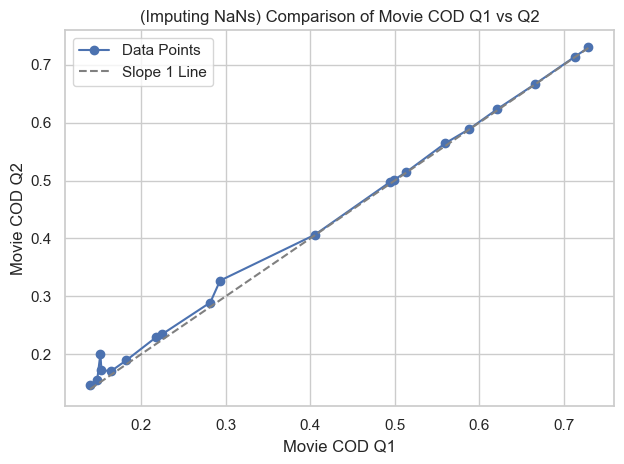

In [49]:
fig, ax = plt.subplots(1, 1)
# Create the plot
plt.plot(np.array(list(movie_cod_q1.values()))[idxs], np.array(list(movie_cod_q2.values()))[idxs], marker='o', label='Data Points')

# Add the slope 1 line
min_val = min(np.min(list(movie_cod_q1.values())), np.min(list(movie_cod_q2.values())))
max_val = max(np.max(list(movie_cod_q1.values())), np.max(list(movie_cod_q2.values())))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', label='Slope 1 Line')

# Add a title, x-axis label, and y-axis label
plt.title('(Imputing NaNs) Comparison of Movie COD Q1 vs Q2')
plt.xlabel('Movie COD Q1')
plt.ylabel('Movie COD Q2')

# Show legend
plt.legend()

# Display the plot
#plt.show()
plt.tight_layout()
plt.savefig('cod_slope_imputing.png')

/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/python_3_11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

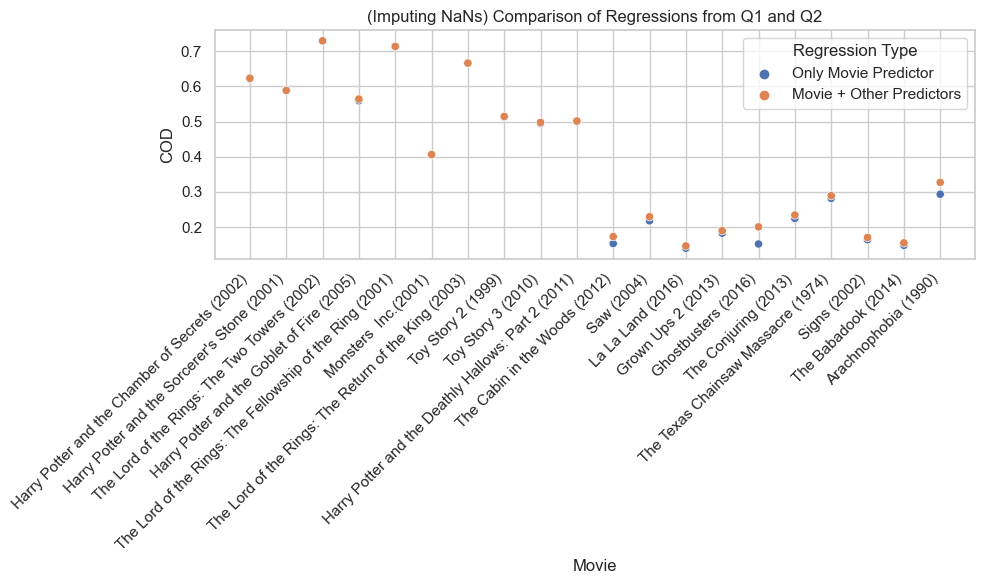

In [50]:
df_q1 = pd.DataFrame(list(movie_cod_q1.items()), columns=['Movie', 'COD'])
df_q2 = pd.DataFrame(list(movie_cod_q2.items()), columns=['Movie', 'COD'])

# Add a 'Source' column to identify the source of data
df_q1['Regression Type'] = 'Only Movie Predictor'
df_q2['Regression Type'] = 'Movie + Other Predictors'

# Concatenate the DataFrames vertically
combined_df = pd.concat([df_q1, df_q2])

# Create the Seaborn plot
sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plot = sns.scatterplot(x="Movie", y="COD", hue="Regression Type", data=combined_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the plot
plt.title("(Imputing NaNs) Comparison of Regressions from Q1 and Q2")
plt.xlabel("Movie")
plt.ylabel("COD")
plt.legend(title="Regression Type", loc="upper right")

# Show the plo
# plot COD1 and COD2 on the x and y axis
#plt.show()
plt.tight_layout()
#plt.savefig('cod_slope_imputing.png')
#plt.savefig('comparison_imputing.png')
plt.savefig('movie_comp_imputing.png')

## AFYD for Question 2

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

    - We chose to only train and evaluate using known targets. That is, not training on filled labels.
    - We chose to treat self-described (gender), and did not answer (sibship status and social viewing) as NaN.
    - We chose to fill unknown answers to gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) with the mode, for the users who had rated each movie.

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

    - In order to model the intended variable and only evaluate for known data, as due to sparsity, the training data would mostly consist of filled target values otherwise.
    - There are very few samples of these across the entire dataset, so they do not have a lot of weight on the predictions. Also, without these answers, the three new variables can be treated as binary variables (which are easier to treat in a linear regression). When the three values are present, there is an inherent assumption that the values can be treated as continuous or at the very least ordinal. There is no inherent reason of why each label is assigned which value (and trying to fit to these arbitrary numeric labels , so it is a sound modelling decision to leave the variables as binary in order to allign better with the model's assumptions.
    - Some users would need to be dropped otherwise. Each non-rating question has a different meaning, and each answer is treated as a continuous variable because we are using OLS. Therefore, the mean should at least allow us to observe the other known variables in the training data for those paired samples. We did an experiment when dropping the values, and some CODs actually dropped in the second model because of the reduced number of training samples, therefore we decided to impute.

4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)

    - Modest COD improvement at best, see plot.
 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).

        - TBD

# Question 3

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [51]:
movie_codQ3 = deepcopy(movie_cod)
for selected_movie in selected_movies: # Removing movies that have already been used in Question 2(About 20 incl. best and worst predicted movies)
    movie_codQ3.pop(selected_movie, None)

In [52]:
for k,v in movie_codQ3.items():
    print(k, v)

The Life of David Gale (2003) 0.4277816370847407
Wing Commander (1999) 0.40677098282291846
Django Unchained (2012) 0.2480278391910039
Alien (1979) 0.31809201497291006
Indiana Jones and the Last Crusade (1989) 0.42515964498763037
Snatch (2000) 0.3867174476914096
Rambo: First Blood Part II (1985) 0.19496422303362004
Fargo (1996) 0.23894486027110695
Let the Right One In (2008) 0.3477941875576924
Black Swan (2010) 0.1007353887039607
King Kong (1976) 0.18984416306590324
The Machinist (2004) 0.3687591647007069
A Nightmare on Elm Street (1984) 0.24056760052908444
Brazil (1985) 0.4952551980683674
The Fast and the Furious (2001) 0.16970839101153168
Change of Habit (1969) 0.49800575787024004
American Beauty (1999) 0.19637658677751135
Psycho (1960) 0.3241314159548071
Terminator 3: Rise of the Machines (2003) 0.2833624114186798
Night of the Living Dead (1968) 0.3217084951847794
Man on Fire (2004) 0.41404830977861173
Star Wars: Episode IV - A New Hope (1977) 0.47906678739494
The Silence of the Lamb

In [53]:
len(movie_codQ3)

380

In [54]:
sortedMovieCod = {movie:cod for movie, cod in sorted(movie_codQ3.items(), key=lambda item: item[1])}
# Sort the dictionary by COD values. 

In [55]:
midCodMovies = dict(list(sortedMovieCod.items())[175:205]) # The total number of movies are 380, this dictionary is sorted as well.
                                        # The 190th movie in this list will have the mean COD value, 
                                        # so 15 movies before and after it will be the middle of our COD range.

In [56]:
len(midCodMovies)

30

In [57]:
midCodMovies

{'The Good the Bad and the Ugly (1966)': 0.3572983370977074,
 'The Green Mile (1999)': 0.3580487037542057,
 'The Girl Next Door (2004)': 0.35968496765666713,
 'Full Metal Jacket (1987)': 0.3604370014011109,
 'Speed 2: Cruise Control (1997)': 0.3629880952862351,
 'Memento (2000)': 0.3674437975808089,
 "Pirates of the Caribbean: Dead Man's Chest (2006)": 0.36799058456629075,
 'Wild Wild West (1999)': 0.36851330272878036,
 'The Machinist (2004)': 0.3687591647007069,
 "There's Something About Mary (1998)": 0.3697900611964825,
 'Magnolia (1999)': 0.37290025433833274,
 'Cast Away (2000)': 0.37607205098492436,
 'Flowers in the Attic (1987)': 0.3794438575909209,
 'Pieces of April (2003)': 0.3802443107034542,
 'Sleepy Hollow (1999)': 0.3804905850558914,
 "Look Who's Talking (1989)": 0.38084108086396884,
 'The Prestige (2006)': 0.38304683466120104,
 'Sling Blade (1996)': 0.3837880973343665,
 'Stand By Me (1986)': 0.3846825456714017,
 'Star Wars: Episode II - Attack of the Clones (2002)': 0.38500

In [58]:
midCodMoviesList = midCodMovies.keys() # removing the middle cod movies from all movies before I choose predictor movies
for midMovie in midCodMoviesList:
    movie_codQ3.pop(midMovie, None)

In [59]:
for k,v in movie_codQ3.items():
    print(k, v)

The Life of David Gale (2003) 0.4277816370847407
Wing Commander (1999) 0.40677098282291846
Django Unchained (2012) 0.2480278391910039
Alien (1979) 0.31809201497291006
Indiana Jones and the Last Crusade (1989) 0.42515964498763037
Rambo: First Blood Part II (1985) 0.19496422303362004
Fargo (1996) 0.23894486027110695
Let the Right One In (2008) 0.3477941875576924
Black Swan (2010) 0.1007353887039607
King Kong (1976) 0.18984416306590324
A Nightmare on Elm Street (1984) 0.24056760052908444
Brazil (1985) 0.4952551980683674
The Fast and the Furious (2001) 0.16970839101153168
Change of Habit (1969) 0.49800575787024004
American Beauty (1999) 0.19637658677751135
Psycho (1960) 0.3241314159548071
Terminator 3: Rise of the Machines (2003) 0.2833624114186798
Night of the Living Dead (1968) 0.3217084951847794
Man on Fire (2004) 0.41404830977861173
Star Wars: Episode IV - A New Hope (1977) 0.47906678739494
The Silence of the Lambs (1991) 0.19401175150910188
The Others (2001) 0.3113742234522767
Minorit

In [60]:
moviePredictors = ["Django Unchained (2012)", "Indiana Jones and the Last Crusade (1989)", "Terminator 3: Rise of the Machines (2003)",
 "Star Wars: Episode IV - A New Hope (1977)", "The Karate Kid Part II (1986)", "The Godfather: Part II (1974)", "Mission: Impossible II (2000)", "Inglorious Bastards (2009)",
 "Love Story (1970)", "Top Gun (1986)"] # I deliberately chose movies I've seen and somewhat liked

In [61]:
print(list(midCodMoviesList))

['The Good the Bad and the Ugly (1966)', 'The Green Mile (1999)', 'The Girl Next Door (2004)', 'Full Metal Jacket (1987)', 'Speed 2: Cruise Control (1997)', 'Memento (2000)', "Pirates of the Caribbean: Dead Man's Chest (2006)", 'Wild Wild West (1999)', 'The Machinist (2004)', "There's Something About Mary (1998)", 'Magnolia (1999)', 'Cast Away (2000)', 'Flowers in the Attic (1987)', 'Pieces of April (2003)', 'Sleepy Hollow (1999)', "Look Who's Talking (1989)", 'The Prestige (2006)', 'Sling Blade (1996)', 'Stand By Me (1986)', 'Star Wars: Episode II - Attack of the Clones (2002)', 'Rocky V (1991)', 'Dogville (2003)', 'The Truman Show (1998)', 'Snatch (2000)', 'The Big Lebowski (1998)', 'Die Another Day (2002)', 'Reservoir Dogs (1992)', 'Goodfellas (1990)', 'Blazing Saddles (1974)', 'Indiana Jones and the Raiders of the Lost Ark (1981)']


In [62]:
moviesToPredict = df_filled[midCodMoviesList]
moviesAsPredictors = df_filled[moviePredictors]

In [63]:
moviesAsPredictors

,Django Unchained (2012),Indiana Jones and the Last Crusade (1989),Terminator 3: Rise of the Machines (2003),Star Wars: Episode IV - A New Hope (1977),The Karate Kid Part II (1986),The Godfather: Part II (1974),Mission: Impossible II (2000),Inglorious Bastards (2009),Love Story (1970),Top Gun (1986)
0,4.000000,3.000000,2.526834,2.856777,3.500000,2.908521,3.000000,2.899902,2.632491,2.713383
1,1.500000,2.752945,2.519042,2.848984,2.644107,2.900728,2.647321,2.892110,2.624698,2.705590
2,3.234118,3.046716,2.812813,3.142755,2.937878,3.194499,2.941092,3.185881,2.918469,2.999361
3,2.000000,3.000000,2.362722,4.000000,2.487788,2.744409,2.491001,3.500000,2.468379,2.549271
4,3.500000,0.500000,2.288880,2.618823,2.413945,2.670567,2.500000,2.661948,2.394537,2.475429
...,...,...,...,...,...,...,...,...,...,...
1092,3.176711,3.500000,2.755405,4.000000,1.500000,3.137092,3.000000,3.128474,2.861062,2.941954
1093,3.413546,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,3.500000,4.000000,4.000000
1094,3.142976,2.955574,2.721670,3.000000,2.000000,3.103357,2.849949,3.094739,2.827327,2.908219
1095,3.272023,3.084621,2.850718,3.180660,2.975783,3.232404,2.978997,3.223786,2.956374,3.037267


In [64]:
def rms_error(model, X, y):
    """
    Computes mean squared error. Our scoring metric for cross validation
    """
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [65]:
X = moviesAsPredictors.values
movieRMSEs = dict()
movieAlphas = dict()
movieWeights = dict()
for movieToPredict in moviesToPredict.columns:
    y = moviesToPredict[movieToPredict]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RidgeCV(alphas=np.logspace(-6, 6, 13)) # This version of Ridge automatically used leave one out validation
    model.fit(X_train, y_train)
    rmseErr = rms_error(model, X_test, y_test)
    movieRMSEs[movieToPredict] = rmseErr
    movieAlphas[movieToPredict] = model.alpha_
    movieWeights[movieToPredict] = model.coef_
    
    
    

In [66]:
for k,v in movieRMSEs.items():
    print(k, v)

The Good the Bad and the Ugly (1966) 0.41148123276491794
The Green Mile (1999) 0.4096966812458719
The Girl Next Door (2004) 0.4503015167288693
Full Metal Jacket (1987) 0.37711793872559213
Speed 2: Cruise Control (1997) 0.3781122726867393
Memento (2000) 0.40656980477489024
Pirates of the Caribbean: Dead Man's Chest (2006) 0.8160850275946571
Wild Wild West (1999) 0.3717345854213932
The Machinist (2004) 0.3633051890770912
There's Something About Mary (1998) 0.45847580206138344
Magnolia (1999) 0.3713859337532094
Cast Away (2000) 0.46347678133019005
Flowers in the Attic (1987) 0.35646725427243864
Pieces of April (2003) 0.2375852004622955
Sleepy Hollow (1999) 0.36434475290731655
Look Who's Talking (1989) 0.4176626626827552
The Prestige (2006) 0.4028438320950608
Sling Blade (1996) 0.24224398372028044
Stand By Me (1986) 0.3595846581631918
Star Wars: Episode II - Attack of the Clones (2002) 0.665376183144559
Rocky V (1991) 0.3425792848161404
Dogville (2003) 0.3446927008073352
The Truman Show (1

In [67]:
resultsTable = pd.DataFrame(movieRMSEs.items(), columns=["Movies", "RMSE"]).sort_values(by="RMSE", ascending=False).reset_index(drop=True)

In [68]:
resultsTable["Alphas"] = [alpha for alpha in movieAlphas.values()]
resultsTable["Weights"] = [weight for weight in movieWeights.values()]

In [69]:
resultsTable

,Movies,RMSE,Alphas,Weights
0,Pirates of the Caribbean: Dead Man's Chest (2006),0.816085,100.0,"[0.06087190552554792, 0.07763983748795976, 0.0..."
1,Star Wars: Episode II - Attack of the Clones (...,0.665376,100.0,"[0.06233619864936515, 0.025457295965103634, 0...."
2,Cast Away (2000),0.463477,100.0,"[0.04751235407001289, 0.0657961275448706, 0.03..."
3,There's Something About Mary (1998),0.458476,10.0,"[-0.0020544300479321685, 0.031201983550096145,..."
4,The Girl Next Door (2004),0.450302,100.0,"[0.060620178298102, 0.06880013588942525, 0.075..."
5,The Truman Show (1998),0.441237,100.0,"[0.09038307925957967, 0.0753956759268758, 0.02..."
6,Indiana Jones and the Raiders of the Lost Ark ...,0.420416,100.0,"[0.06190543282880602, 0.1384533307469554, 0.16..."
7,Look Who's Talking (1989),0.417663,10.0,"[0.03763810087559786, 0.033124020655191586, 0...."
8,The Good the Bad and the Ugly (1966),0.411481,100.0,"[0.08122402780006259, 0.07565888718098207, 0.0..."
9,The Green Mile (1999),0.409697,10.0,"[-0.01691745305974329, 0.020014503614905595, 0..."


In [70]:
for k,v in movieAlphas.items():
    print(k, v)

The Good the Bad and the Ugly (1966) 100.0
The Green Mile (1999) 100.0
The Girl Next Door (2004) 100.0
Full Metal Jacket (1987) 10.0
Speed 2: Cruise Control (1997) 100.0
Memento (2000) 100.0
Pirates of the Caribbean: Dead Man's Chest (2006) 100.0
Wild Wild West (1999) 10.0
The Machinist (2004) 100.0
There's Something About Mary (1998) 10.0
Magnolia (1999) 10.0
Cast Away (2000) 100.0
Flowers in the Attic (1987) 100.0
Pieces of April (2003) 10.0
Sleepy Hollow (1999) 10.0
Look Who's Talking (1989) 100.0
The Prestige (2006) 100.0
Sling Blade (1996) 10.0
Stand By Me (1986) 100.0
Star Wars: Episode II - Attack of the Clones (2002) 100.0
Rocky V (1991) 100.0
Dogville (2003) 100.0
The Truman Show (1998) 100.0
Snatch (2000) 10.0
The Big Lebowski (1998) 10.0
Die Another Day (2002) 10.0
Reservoir Dogs (1992) 100.0
Goodfellas (1990) 10.0
Blazing Saddles (1974) 10.0
Indiana Jones and the Raiders of the Lost Ark (1981) 100.0


In [71]:
for k,v in movieWeights.items():
    print(k, v)

The Good the Bad and the Ugly (1966) [0.06087191 0.07763984 0.02227559 0.06204957 0.07014484 0.11980551
 0.04980378 0.08845592 0.12793965 0.07269786]
The Green Mile (1999) [ 0.0623362   0.0254573   0.09893471  0.01684228  0.06302319  0.13113294
  0.04954823  0.04496632  0.0906686  -0.00547182]
The Girl Next Door (2004) [0.04751235 0.06579613 0.0379157  0.03406406 0.10647708 0.07014097
 0.06363482 0.07643158 0.14779921 0.05818297]
Full Metal Jacket (1987) [-2.05443005e-03  3.12019836e-02  5.63606438e-05  2.98330193e-02
  2.39658931e-02  1.99437313e-01  3.60385083e-02  1.27185019e-01
  4.39575820e-01  7.70149437e-02]
Speed 2: Cruise Control (1997) [0.06062018 0.06880014 0.07567717 0.05729177 0.0586128  0.04623898
 0.07024289 0.03493756 0.11981507 0.09718219]
Memento (2000) [0.09038308 0.07539568 0.02512976 0.07671603 0.04514729 0.12042612
 0.04104719 0.06745677 0.1083858  0.01819442]
Pirates of the Caribbean: Dead Man's Chest (2006) [ 0.06190543  0.13845333  0.16371621  0.01691896  0.082

## AFYD for Question 3

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

We used regularized regression to predict the ratings of 30 movies given any 10 other movies from the data set. We chose these 10 movies deliberately. When predicting the ratings, we are using the imputed ratings values as targets as well. 
    

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

Ridge regression helps in cases where your model is overfitting the data by reducing the size of the cofficients and making the model more linear. This is especially necessary since we are training and testing on target values which contain imputed data, so we can't risk our model overfitting on some set values and obsfucating the underlying trend. 
We also deliberately chose the movies we would use as predictors. This was done so we could include at least a couple of movies that are from the same genre as the 30 movies that we are predicting (the decision to include Godfather Part II because Goodfellas (both mafia movies) is one of the 30 movies.


4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)


 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).
